Импортируем библиотеки

In [17]:

import pandas as pd
from tqdm import trange
import pymorphy2
import matplotlib.pyplot as plt

import iterator

С использованием средств библиотеки Pandas прочитать все данные (в DataFrame будет несколько столбцов, в зависимости от варианта, например, у варианта 10 - Количество звезд, Текст рецензии).

Создаем функции для создания таблицы, и чтения файла для ее заполнения.

In [18]:
def create_table()-> pd.DataFrame:
    """create a df"""
    number_star = []
    text_opinion = []
    for i in range(1,6):
        iterator_work = iterator.Iterator("test_csv.csv", i)
        for j in trange(len(iterator.Iterator("test_csv.csv", i).list)):
            number_star.append(i)
            text_opinion.append(read_file(iterator.Iterator("test_csv.csv", i).list[j]))
    df = pd.DataFrame({
    'star': number_star,
    'text': text_opinion})
    return df


def read_file(elem: str)->str:
    """"reading a data from csv"""
    if elem != "['absolut path,relative path,quote']":
        directory = str(elem).split(",")
        #print(len(directory))
        if len(directory) == 3:
            with open(directory[1], "r",encoding="utf-8") as f:
                text = f.read()
            
            return text     
    return None

Собственно запускаем это все дело

In [19]:
df=create_table()


100%|██████████| 999/999 [00:09<00:00, 108.15it/s]


Произвести проверку на наличие невалидных значений в колонках (NaN, None и т.п.). В случае нахождения выполнить обработку таких значений.

Функция проверки таблицы на пустые ячейки, удаляем строку если ячейка пустая

In [20]:
def check_table(df:pd.DataFrame)->pd.DataFrame:
    """check table to correct value"""
    df=df.dropna()
    print(df.info())
    return df

In [21]:
df=check_table(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4995 entries, 0 to 4994
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   star    4995 non-null   int64 
 1   text    4995 non-null   object
dtypes: int64(1), object(1)
memory usage: 78.2+ KB
None


Добавить в DataFrame столбец, который будет содержать информацию о кол-ве слов в ячейке, содержащей текстовую информацию.

Добавляем в нашу таблицу еще одну колонку с длиной отзыва, и заполняем ее

In [22]:
def add_column(df)-> pd.DataFrame:
    """add_column in df """
    print("add_column")
    number_symbols_text = []
    for i in trange(len(df)):
        number_symbols_text.append(len(df.text[i]))

    df.insert(2, "len_text", number_symbols_text, False)
    return df
    

In [23]:
df=add_column(df)

add_column


100%|██████████| 4995/4995 [00:00<00:00, 104276.20it/s]



С использованием Pandas вычислить статистическую информацию для столбцов, содержащих числовую информацию.

In [24]:
def statistic(df: pd.DataFrame)-> None:
    """statistic in star"""
    print(df.describe())
    

In [25]:
statistic(df)


              star      len_text
count  4995.000000   4995.000000
mean      3.000000   1137.157558
std       1.414355   1000.543351
min       1.000000     20.000000
25%       2.000000    739.000000
50%       3.000000    822.000000
75%       4.000000   1337.000000
max       5.000000  14764.000000


Написать функцию, которая на вход принимает DataFrame и количество слов, а возвращает отфильтрованный по количеству слов DataFrame. Условие фильтрации - в новый DataFrame включаются те строки, для которых значение в столбце с количеством слов  ≤  заданного значения.

Сортуруем таблицу по количеству слов

In [26]:
def sorted_table(df: pd.DataFrame,count_words: int)->None:
    """sorted_tabel on width words"""
    return df[df['len_text'] > count_words][['star', 'text','len_text']]


In [27]:
sorted_table(df,10000)

,star,text,len_text
72,1,Оценка: 1.0\nНазвание: Уничтожить королевство\...,12159
3287,4,Оценка: 4.0\nНазвание: Шестерка Атласа\nАвтор ...,14764
4027,5,Оценка: 5.0\nНазвание: Брак по расчету. Златок...,13591
4029,5,Оценка: 5.0\nНазвание: Брак по расчету. Златок...,13591
4124,5,Оценка: 5.0\nНазвание: Брак по расчету. Златок...,13591
4576,5,Оценка: 5.0\nНазвание: Чагин\nАвтор книги: Евг...,12743


Написать функцию, которая на вход принимает DataFrame и метку класса (например, Количество звезд), а возвращает отфильтрованный по заданной метке DataFrame.

Сортируем по звездам

In [28]:
def table_star(df: pd.DataFrame, number_star: int)->None:
    """Sorted table"""
    return df[df['star']==number_star]

In [29]:
table_star(df,4)

,star,text,len_text
2997,4,Оценка: 4.0\nНазвание: Клуб самоубийц. Алмаз Р...,784
2998,4,Оценка: 3.5\nНазвание: Ведьма огненного ветра\...,201
2999,4,Оценка: 3.5\nНазвание: Моя темная королева\nАв...,1032
3000,4,Оценка: 3.5\nНазвание: Мидлмарч\nАвтор книги: ...,3028
3001,4,Оценка: 4.0\nНазвание: Мрачный Вторник\nАвтор ...,975
...,...,...,...
3991,4,"Жизнь, которая не стала моей\n\n\n\nКейт 40 ле...",831
3992,4,Нелюбимая дочь. Как оставить в прошлом травмат...,895
3993,4,Дочь костяных осколков\n\n\n\nЗахотелось мне ч...,819
3994,4,Высоцкий\n\n\n\nВладимир Высоцкий наверное еди...,809


Выполнить группировку DataFrame по метке класса с вычислением максимального, минимального и среднего значения по количеству слов.

In [30]:
def table_star_statistic(df: pd.DataFrame, number_star: int) -> None:
    """print df where star== number_star"""
    df = df[df["star"] == number_star]
    print(df)
    print(
        "кол-во слов:\nmin: " + str(df["len_text"].min()) + "\nmean: " + str(df["len_text"].mean()) + "\nmax: " + str(df["len_text"].max())
        )

In [31]:
table_star_statistic(df, 5)


      star                                               text  len_text
3996     5  Оценка: 4.5\nНазвание: Волков. Исцеление любов...       737
3997     5  Оценка: 5.0\nНазвание: Год великого перелома\n...       159
3998     5  Оценка: 5.0\nНазвание: По ту сторону жизни\nАв...      3128
3999     5  Оценка: 5.0\nНазвание: Дарители. Короли будуще...      1285
4000     5  Оценка: 5.0\nНазвание: Культ\nАвтор книги: Эбб...       897
...    ...                                                ...       ...
4990     5  Оценка: 5.0\nНазвание: Дочка для владельца Имп...      1525
4991     5  Оценка: 4.5\nНазвание: Средство Макропулоса\nА...      2356
4992     5  Оценка: 4.5\nНазвание: На Западном фронте без ...      1282
4993     5  Оценка: 4.5\nНазвание: Суррогатная мать\nАвтор...      1061
4994     5  Оценка: 5.0\nНазвание: Село Степанчиково и его...      1683

[999 rows x 3 columns]
кол-во слов:
min: 91
mean: 1591.3463463463463
max: 13591


Написать функцию, которая на вход принимает DataFrame и метку класса, а возвращает гистограмму для слов. Для расчета гистограммы необходимо будет разбить блоки текста на слова и выполнить процедуру лемматизации для каждого слова (используя библиотеку nltk).

In [32]:
def create_hist(df: pd.DataFrame, number_star: int) -> list:
    """Lemitization and counter words"""
    words = []  # для леминитизированных слов
    lonely_words_count = []  # для подсчета вхождений каждого слова
    morph = pymorphy2.MorphAnalyzer()
    print("Обрабатываем кол-во слов")
    for i in trange(len(df[df["star"] == number_star])):
        words_list = (df.text[i]).split()  # разбиваем текст на слова
        for word in words_list:
            p = morph.parse(word)[0]
            words.append(p.normal_form)

    lonely_words = list(set(words))  # слова без повторений
    for element in lonely_words:
        lonely_words_count.append(words.count(element))
    book = dict(zip(lonely_words_count, lonely_words))
    return sorted(book.items())  # вернем остортированный  словарь
    

In [33]:
hist_info = create_hist(df, 4)

Обрабатываем кол-во слов


100%|██████████| 999/999 [00:23<00:00, 43.26it/s]


Выполнить визуализацию гистограммы, полученной из пункта 9, с помощью средств библиотеки matplotlib. Соответствующие оси, графики и значения необходимо подписать.


In [50]:
def print_histogram(hist_info: dict) -> None:
    """print histogram on based dict"""
    plt.title("Популярность слов:")
    plt.xlabel("Слова")
    plt.ylabel("количество использований")
    plt.grid(True)
    plt.bar(hist_info.values(), hist_info.keys())
    plt.show()

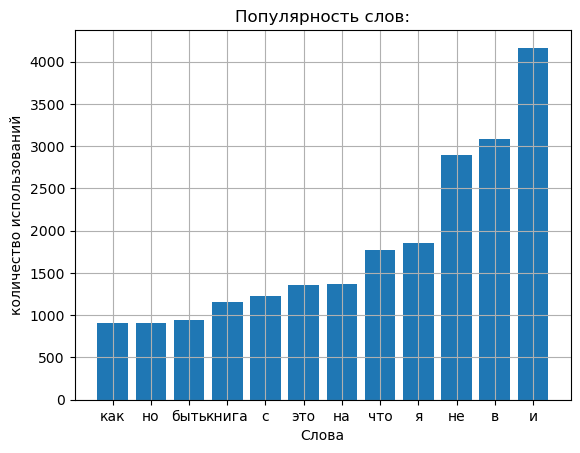

In [51]:
print_histogram(dict(hist_info[-12:]))  